In [1]:
import numpy as np

from tqdm import tqdm

from sklearn.datasets import fetch_20newsgroups

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, Concatenate
from tensorflow.keras.models import Model

Using TensorFlow backend.


In [2]:
categories = ['comp.sys.mac.hardware', 'rec.sport.baseball'] 

newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True, 
                                      categories=categories,)

print (newsgroups_train.target_names)
print (len(newsgroups_train.data))

#print (newsgroups_train.data[1])
print("\n".join(newsgroups_train.data[0].split("\n")[10:15]))

['comp.sys.mac.hardware', 'rec.sport.baseball']
1175
will tell me whether or not I have the right kind of RAM installed.  I
had thought that the problem was the battery connection.

Thanks in Advance,



In [3]:
%%time

texts = []

labels = newsgroups_train.target
texts = newsgroups_train.data

MAX_SEQUENCE_LENGTH = 1000
MAX_NB_WORDS = 20000

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

print (sequences[0][:10])
# print(newsgroups_train)

[13, 11119, 1619, 367, 9, 7974, 7975, 23, 460, 220]
Wall time: 320 ms


In [4]:
word_index = tokenizer.word_index 

print('Found %s unique tokens.' % len(word_index)) # 실제 토큰이 몇개인가 알아보자 = 단어 수

Found 18002 unique tokens.


In [5]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

print (data.shape)
print (data[0][200:250])
print (texts[0])

(1175, 1000)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
From: afung@athena.mit.edu (Archon Fung)
Subject: wrong RAM in Duo?
Organization: Massachusetts Institute of Technology
Lines: 9
Distribution: world
NNTP-Posting-Host: thobbes.mit.edu

A few posts back, somebody mentioned that the Duo might crash if it has
the wrong kind (non-self refreshing) of RAM in it.  My Duo crashes
sometimes after sleep, and I am wondering if there is any software which
will tell me whether or not I have the right kind of RAM installed.  I
had thought that the problem was the battery connection.

Thanks in Advance,

Archon Fung



In [6]:
labels = to_categorical(np.array(labels))

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (1175, 1000)
Shape of label tensor: (1175, 2)


In [7]:
VALIDATION_SPLIT = 0.2

indices = np.arange(data.shape[0])
np.random.shuffle(indices) 
data = data[indices] 
labels = labels[indices] 
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples] 
y_train = labels[:-nb_validation_samples] 
x_val = data[-nb_validation_samples:] 
y_val = labels[-nb_validation_samples:] 

print (x_train.shape)
print (y_train.shape)

print('Number of positive and negative reviews in traing and validation set ') 
print (y_train.sum(axis=0))
print (y_val.sum(axis=0))

(940, 1000)
(940, 2)
Number of positive and negative reviews in traing and validation set 
[458. 482.]
[120. 115.]


In [11]:
%%time
embeddings_index = {}

f = open('glove.6B.100d.txt', encoding='utf-8')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print ()
print ('Found %s word vectors.' % len(embeddings_index))


0it [00:00, ?it/s]
2914it [00:00, 28851.60it/s]
5966it [00:00, 29331.97it/s]
9027it [00:00, 29617.82it/s]
12048it [00:00, 29792.84it/s]
15057it [00:00, 29792.82it/s]
18021it [00:00, 28793.26it/s]
21054it [00:00, 29154.19it/s]
24057it [00:00, 29410.19it/s]
27106it [00:00, 29639.73it/s]
30157it [00:01, 29807.99it/s]
33186it [00:01, 29950.92it/s]
36214it [00:01, 29959.71it/s]
39172it [00:01, 29665.21it/s]
42161it [00:01, 29732.28it/s]
45116it [00:01, 29677.28it/s]
48071it [00:01, 29461.77it/s]
51072it [00:01, 29624.03it/s]
54029it [00:01, 29169.42it/s]
57109it [00:01, 29555.23it/s]
60131it [00:02, 29751.47it/s]
63204it [00:02, 29950.48it/s]
66216it [00:02, 29911.94it/s]
69242it [00:02, 30014.50it/s]
72302it [00:02, 30099.61it/s]
75364it [00:02, 30164.06it/s]
78381it [00:02, 29987.29it/s]
81381it [00:02, 29989.81it/s]
84411it [00:02, 29993.30it/s]
87411it [00:02, 29727.81it/s]
90408it [00:03, 29799.98it/s]
93437it [00:03, 29945.00it/s]
96506it [00:03, 30076.26it/s]
99560it [00:03, 30124.6


Found 400000 word vectors.
Wall time: 13.5 s


In [12]:
EMBEDDING_DIM = 100

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))

for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    # words not found in embedding index will be all-zeros.
    embedding_matrix[i] = embedding_vector

print (embedding_matrix.shape)

print (embedding_matrix[0][:10])

(18003, 100)
[0.98703497 0.50388713 0.10820122 0.91041304 0.41650211 0.56268439
 0.20678113 0.3636473  0.7995503  0.53232304]


In [13]:
embedding_layer = Embedding(len(word_index) + 1, EMBEDDING_DIM,
                            weights=[embedding_matrix], 
                            input_length=MAX_SEQUENCE_LENGTH, 
                            trainable=False)

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32') 
embedded_sequences = embedding_layer(sequence_input) 
l_cov1= Conv1D(128, 5, activation='relu')(embedded_sequences) 
l_pool1 = MaxPooling1D(5)(l_cov1) 
l_cov2 = Conv1D(128, 5, activation='relu')(l_pool1) 
l_pool2 = MaxPooling1D(5)(l_cov2) 
l_cov3 = Conv1D(128, 5, activation='relu')(l_pool2) 
l_pool3 = MaxPooling1D(35)(l_cov3)  # global max pooling

l_flat = Flatten()(l_pool3) 
l_dense = Dense(128, activation='relu')(l_flat) 
preds = Dense(2, activation='softmax')(l_dense)

model = Model(sequence_input, preds)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1000, 100)         1800300   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 996, 128)          64128     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 199, 128)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 195, 128)          82048     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 39, 128)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 35, 128)           8204

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                    epochs=10, batch_size=128) 

Train on 940 samples, validate on 235 samples
Epoch 1/10
940/940 [==============================] - 4s 4ms/sample - loss: 0.7922 - acc: 0.5287 - val_loss: 0.6730 - val_acc: 0.5574
Epoch 2/10
940/940 [==============================] - 3s 3ms/sample - loss: 0.6439 - acc: 0.6277 - val_loss: 0.5808 - val_acc: 0.8340
Epoch 3/10
940/940 [==============================] - 3s 3ms/sample - loss: 0.4666 - acc: 0.8606 - val_loss: 0.3328 - val_acc: 0.9021
Epoch 4/10
940/940 [==============================] - 3s 3ms/sample - loss: 0.1912 - acc: 0.9543 - val_loss: 0.1004 - val_acc: 0.9617
Epoch 5/10
940/940 [==============================] - 3s 3ms/sample - loss: 0.0715 - acc: 0.9809 - val_loss: 0.0411 - val_acc: 0.9872
Epoch 6/10
940/940 [==============================] - 3s 3ms/sample - loss: 0.0465 - acc: 0.9851 - val_loss: 0.0208 - val_acc: 0.9957
Epoch 7/10
940/940 [==============================] - 3s 4ms/sample - loss: 0.0308 - acc: 0.9904 - val_loss: 0.1144 - val_acc: 0.9574
Epoch 8/10
940/9

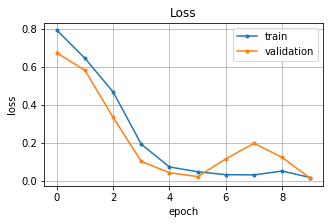

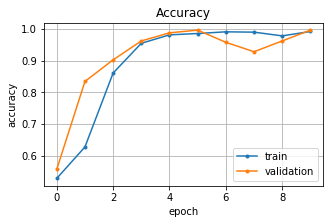

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize =(5,3))
plt.plot(history.history['loss'], marker='.', label='train')
plt.plot(history.history['val_loss'], marker='.', label='validation')
plt.title('Loss')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

plt.figure(figsize =(5,3))
plt.plot(history.history['acc'], marker='.', label='train')
plt.plot(history.history['val_acc'], marker='.', label='validation')
plt.title('Accuracy')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

## Model 2

In [16]:
convs = [] 
filter_sizes = [3,4,5]

embedding_layer = Embedding(len(word_index) + 1, EMBEDDING_DIM,
                            weights=[embedding_matrix], 
                            input_length=MAX_SEQUENCE_LENGTH, 
                            trainable=True)

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32') 
embedded_sequences = embedding_layer(sequence_input)

for fsz in filter_sizes:
  l_conv = Conv1D(filters=128, kernel_size=fsz, activation='relu')(embedded_sequences)
  l_pool = MaxPooling1D(5)(l_conv)
  convs.append(l_pool)

l_merge = Concatenate(axis=1)(convs) 
l_cov1= Conv1D(128, 5, activation='relu')(l_merge) 
l_pool1 = MaxPooling1D(5)(l_cov1) 
l_cov2 = Conv1D(128, 5, activation='relu')(l_pool1) 
l_pool2 = MaxPooling1D(30)(l_cov2) 
l_flat = Flatten()(l_pool2) 
l_dense = Dense(128, activation='relu')(l_flat) 
preds = Dense(2, activation='softmax')(l_dense)

model = Model(sequence_input, preds) 

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1000)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1000, 100)    1800300     input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 998, 128)     38528       embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 997, 128)     51328       embedding_2[0][0]                
____________________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['acc'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                    epochs=10, batch_size=128)

plt.figure(figsize =(5,3))
plt.plot(history.history['loss'], marker='.', label='train')
plt.plot(history.history['val_loss'], marker='.', label='validation')
plt.title('Loss')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

plt.figure(figsize =(5,3))
plt.plot(history.history['acc'], marker='.', label='train')
plt.plot(history.history['val_acc'], marker='.', label='validation')
plt.title('Accuracy')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()